In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pygal
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')


In [5]:
subject_info.head()

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test
0,10.8,48.8,163.0,39.0,20.7,1,543,543_1
1,11.8,41.0,150.0,41.0,22.3,1,11,11_1
2,12.2,46.0,160.0,37.0,21.5,0,829,829_1
3,13.2,71.0,190.0,49.0,23.8,1,284,284_1
4,13.7,53.8,169.7,40.0,25.3,0,341,341_1


In [7]:
test_measure.head()

,time,Speed,HR,VO2,VCO2,RR,VE,ID_test,ID
0,0,5.0,63.0,478.0,360.0,27,13.3,2_1,2
1,2,5.0,75.0,401.0,295.0,23,10.3,2_1,2
2,4,5.0,82.0,449.0,319.0,29,12.2,2_1,2
3,7,5.0,87.0,461.0,340.0,28,12.8,2_1,2
4,9,5.0,92.0,574.0,417.0,28,14.6,2_1,2


In [29]:
df=test_measure.copy()

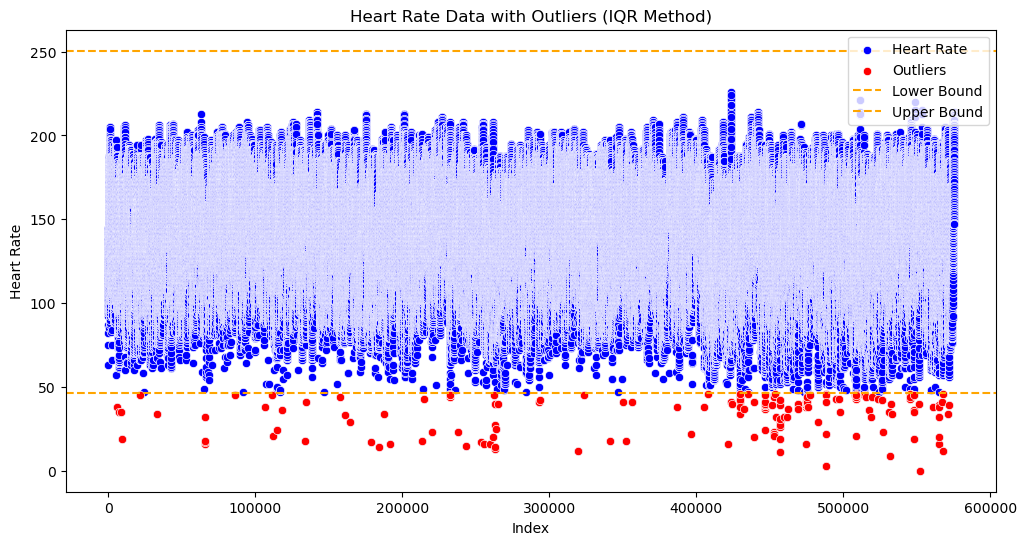

In [31]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['HR'].quantile(0.25)
Q3 = df['HR'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['HR'] < lower_bound) | (df['HR'] > upper_bound)]

# Visualize the data and outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.index, y='HR', data=df, label='Heart Rate', color='blue')
sns.scatterplot(x=outliers.index, y='HR', data=outliers, label='Outliers', color='red')
plt.axhline(lower_bound, color='orange', linestyle='--', label='Lower Bound')
plt.axhline(upper_bound, color='orange', linestyle='--', label='Upper Bound')
plt.xlabel('Index')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Data with Outliers (IQR Method)')
plt.legend(loc='upper right')  # Specify legend location
plt.show()


In [37]:
participant_df=subject_info.copy()

test_df = test_measure.copy()

In [39]:

# Find the participant with the maximum number of Graded Exercise Tests
most_tests = participant_df['ID_test'].value_counts().idxmax()

# Create a pivot table with summary statistics
pivot_table = test_df.pivot_table(values=['time', 'Speed', 'HR', 'VO2', 'RR'], index='ID_test', aggfunc=['mean', 'min', 'max'])

# Display the results
print(f"Participant with the maximum number of Graded Exercise Tests: {most_tests}")
print("\nPivot Table with Summary Statistics:")
print(pivot_table)


Participant with the maximum number of Graded Exercise Tests: 543_1

Pivot Table with Summary Statistics:
               mean                                                   min      \
                 HR         RR      Speed          VO2        time     HR  RR   
ID_test                                                                         
100_1    133.684211  36.380068   9.431757  2168.690878  547.751689   54.0  20   
101_1    154.113924  30.357895   9.396421  2147.593684  574.117895  107.0  14   
102_1    167.868347  28.568627   8.208123  2821.070028  520.789916  101.0  10   
103_1    153.094643  42.264286   9.513571  2672.251786  464.794643   85.0  17   
104_1    139.322751  31.292769  10.982540  2396.236332  607.544974   63.0  17   
...             ...        ...        ...          ...         ...    ...  ..   
98_1     130.848696  31.200000   9.327130  2374.224348  660.288696   56.0  16   
99_1     129.361552  37.689594   8.168078  1703.229277  485.414462   57.0  24   
99_

In [43]:
# Load the dataset
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')


In [47]:

# Join the dataframes on ID and ID_test
joined_df = pd.merge(test_measure, subject_info, on=['ID', 'ID_test'], how='inner')

# Find the participant with the maximum number of Graded Exercise Tests
max_tests_participant = joined_df['ID'].value_counts().idxmax()

# Filter the participant with the maximum tests
max_tests_df = joined_df[joined_df['ID'] == max_tests_participant]

# Create a pivot table with summary statistics
pivot_table = max_tests_df.pivot_table(values=['time', 'Speed', 'HR', 'VO2', 'RR'], index='ID_test', aggfunc=['mean', 'min', 'max'])

# Display the result
print(f"Participant with the maximum number of Graded Exercise Tests: {max_tests_participant}")
print("\nPivot Table with Summary Statistics:")
print(pivot_table)


Participant with the maximum number of Graded Exercise Tests: 492

Pivot Table with Summary Statistics:
               mean                                                  min      \
                 HR         RR      Speed          VO2        time    HR  RR   
ID_test                                                                        
492_1    148.506720  44.884409  10.417473  2745.202957  630.158602  71.0  15   
492_31   146.485275  46.306018  10.370551  3017.494238  649.711908  87.0  12   
492_45   145.509069  45.743652  11.356106  2690.796856  714.032648  74.0  19   
492_57   151.498150  47.125771  11.217509  2748.234279  682.245376  87.0  19   

                              max                          
        Speed     VO2 time     HR  RR Speed     VO2  time  
ID_test                                                    
492_1     5.0   681.0    0  189.0  62  18.2  4098.0  1090  
492_31    0.0  1005.0    0  185.0  70  18.4  4416.0  1124  
492_45    5.0   351.0    0  186.0  

In [50]:
max_tests_participant

492

Participant with the maximum number of Graded Exercise Tests: 492

Pivot Table with Summary Statistics:
               mean                                                  min      \
                 HR         RR      Speed          VO2        time    HR  RR   
ID_test                                                                        
492_1    148.506720  44.884409  10.417473  2745.202957  630.158602  71.0  15   
492_31   146.485275  46.306018  10.370551  3017.494238  649.711908  87.0  12   
492_45   145.509069  45.743652  11.356106  2690.796856  714.032648  74.0  19   
492_57   151.498150  47.125771  11.217509  2748.234279  682.245376  87.0  19   

                              max                          
        Speed     VO2 time     HR  RR Speed     VO2  time  
ID_test                                                    
492_1     5.0   681.0    0  189.0  62  18.2  4098.0  1090  
492_31    0.0  1005.0    0  185.0  70  18.4  4416.0  1124  
492_45    5.0   351.0    0  186.0  

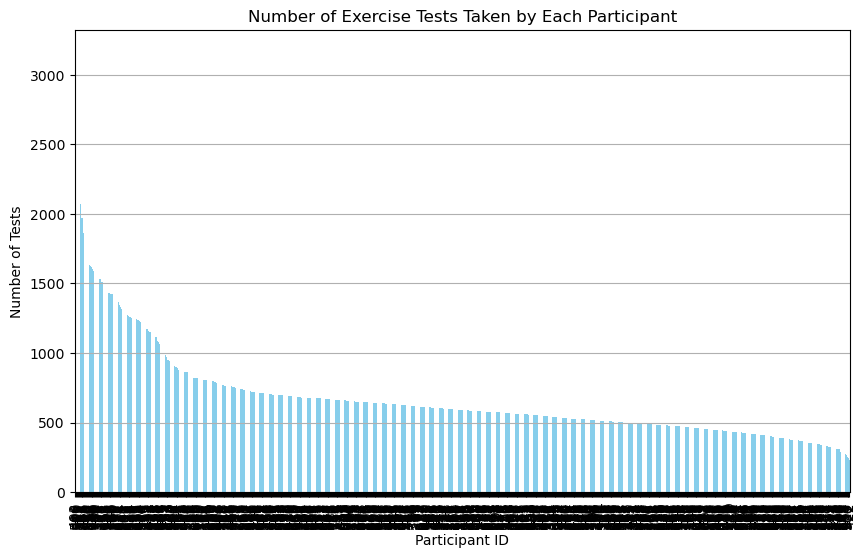

In [66]:
# Join the dataframes on ID and ID_test
joined_df = pd.merge(test_measure, subject_info, on=['ID', 'ID_test'], how='inner')

# Count the number of tests each participant took
tests_per_participant = joined_df['ID'].value_counts()

num_participants = subject_info['ID'].nunique()


# Find the ID with the maximum number of exercise tests
max_exercise_id = tests_per_participant.idxmax()

# Filter the participant with the maximum tests
max_tests_df = joined_df[joined_df['ID'] == max_exercise_id]

# Create a pivot table with summary statistics
pivot_table = max_tests_df.pivot_table(values=['time', 'Speed', 'HR', 'VO2', 'RR'], index='ID_test', aggfunc=['mean', 'min', 'max'])

# Display the result
print(f"Participant with the maximum number of Graded Exercise Tests: {max_exercise_id}")
print("\nPivot Table with Summary Statistics:")
print(pivot_table)

# Plot the number of tests taken by each participant
plt.figure(figsize=(10, 6))
tests_per_participant.plot(kind='bar', color='skyblue')
plt.title('Number of Exercise Tests Taken by Each Participant')
plt.xlabel('Participant ID')
plt.ylabel('Number of Tests')
plt.grid(axis='y')
plt.show()


Number of participants: 857


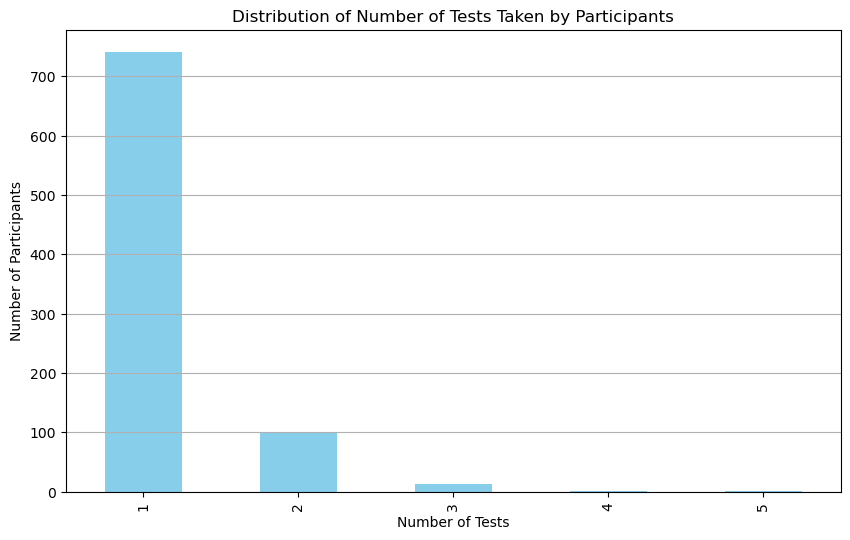

In [70]:
# Count the number of unique participants
num_participants = subject_info['ID'].nunique()

# Count the number of tests each participant took
tests_per_participant = subject_info['ID'].value_counts()

# Group by the number of tests
grouped_tests = tests_per_participant.value_counts().sort_index()

# Plot the bar graph
print(f"Number of participants: {num_participants}")
plt.figure(figsize=(10, 6))
grouped_tests.plot(kind='bar', color='skyblue')
plt.title('Distribution of Number of Tests Taken by Participants')
plt.xlabel('Number of Tests')
plt.ylabel('Number of Participants')
plt.grid(axis='y')
plt.show()


In [73]:
tests_per_participant

ID
506    5
492    4
511    3
552    3
553    3
      ..
725    1
265    1
695    1
165    1
296    1
Name: count, Length: 857, dtype: int64

In [75]:
# Load the dataset
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')


In [77]:
df=subject_info.copy()

In [79]:
df.head()

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test
0,10.8,48.8,163.0,39.0,20.7,1,543,543_1
1,11.8,41.0,150.0,41.0,22.3,1,11,11_1
2,12.2,46.0,160.0,37.0,21.5,0,829,829_1
3,13.2,71.0,190.0,49.0,23.8,1,284,284_1
4,13.7,53.8,169.7,40.0,25.3,0,341,341_1


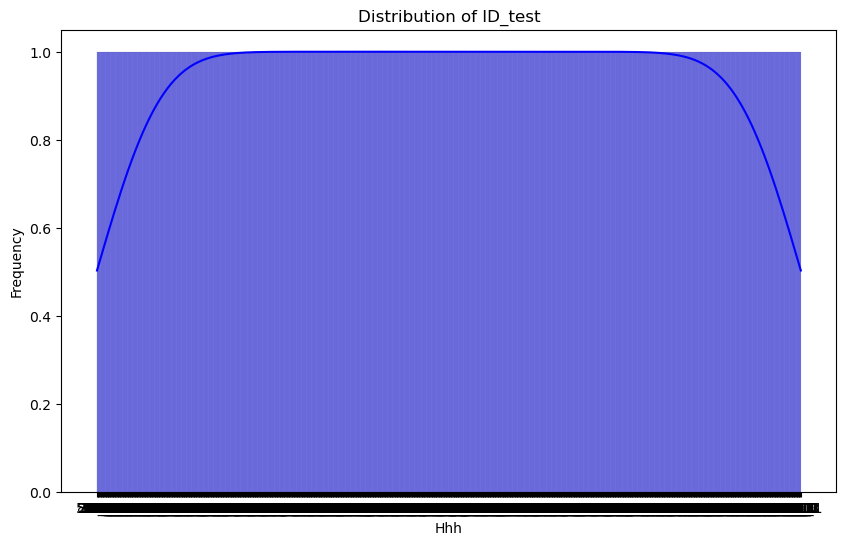

In [85]:
# Create a histogram to visualize the distribution of HRR
plt.figure(figsize=(10, 6))
sns.histplot(df['ID_test'], bins=30, kde=True, color='blue')
plt.title('Distribution of ID_test')
plt.xlabel('Hhh')
plt.ylabel('Frequency')
plt.show()

In [90]:
df['ID_test'].nunique()

992

In [94]:
df['ID_test']

0      543_1
1       11_1
2      829_1
3      284_1
4      341_1
       ...  
987    856_2
988    856_3
989    390_1
990    596_1
991    296_1
Name: ID_test, Length: 992, dtype: object

In [96]:


# Strip ID from ID_test and group by the number of tests
df["No_of_tests"] = df["ID_test"].apply(lambda x: x.split('_')[-1])

# Display the modified DataFrame
print(df[["Age", "Weight", "Height", "Humidity", "Temperature", "Sex", "No_of_tests"]])


      Age  Weight  Height  Humidity  Temperature  Sex No_of_tests
0    10.8    48.8   163.0      39.0         20.7    1           1
1    11.8    41.0   150.0      41.0         22.3    1           1
2    12.2    46.0   160.0      37.0         21.5    0           1
3    13.2    71.0   190.0      49.0         23.8    1           1
4    13.7    53.8   169.7      40.0         25.3    0           1
..    ...     ...     ...       ...          ...  ...         ...
987  59.1    64.7   172.0      38.0         24.4    0           2
988  59.7    65.2   172.0      51.0         16.8    0           3
989  61.3   102.0   185.0      56.0         20.5    0           1
990  61.6    74.0   169.0      46.0         23.9    0           1
991  63.0    83.5   171.5      48.0         22.2    0           1

[992 rows x 7 columns]


In [100]:
df['No_of_tests'].value_counts()

No_of_tests
1      857
5        9
2        6
7        5
9        5
      ... 
83       1
51       1
35       1
371      1
21       1
Name: count, Length: 68, dtype: int64

In [104]:
df['No_of_tests'].nunique()

68

Number of participants: 857


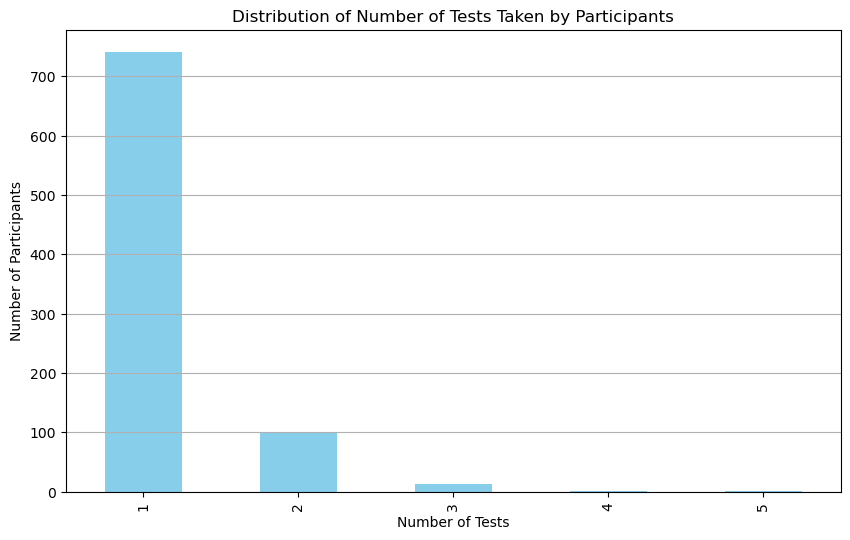

In [5]:
# Count the number of unique participants
num_participants = subject_info['ID'].nunique()

# Count the number of tests each participant took
tests_per_participant = subject_info['ID'].value_counts()

# Group by the number of tests
grouped_tests = tests_per_participant.value_counts().sort_index()

# Plot the bar graph
print(f"Number of participants: {num_participants}")
plt.figure(figsize=(10, 6))
grouped_tests.plot(kind='bar', color='skyblue')
plt.title('Distribution of Number of Tests Taken by Participants')
plt.xlabel('Number of Tests')
plt.ylabel('Number of Participants')
plt.grid(axis='y')
plt.show()


In [7]:
tests_per_participant

ID
506    5
492    4
511    3
552    3
553    3
      ..
725    1
265    1
695    1
165    1
296    1
Name: count, Length: 857, dtype: int64

In [9]:

grouped_tests

count
1    741
2    100
3     14
4      1
5      1
Name: count, dtype: int64

In [11]:
# Find the participant with the maximum number of tests
max_tests_participant = tests_per_participant.idxmax()
max_tests_count = tests_per_participant.max()

# Create a dataframe for the participant with the maximum tests
max_tests_df = subject_info[subject_info['ID'] == max_tests_participant]

# Display the result
print(f"Participant with the maximum tests: {max_tests_participant} with {max_tests_count} tests.")
print(max_tests_df)

Participant with the maximum tests: 506 with 5 tests.
      Age  Weight  Height  Humidity  Temperature  Sex   ID ID_test
928  46.1    72.0   173.0      45.0         24.4    0  506   506_1
937  46.8    69.5   173.0      39.0         21.6    0  506  506_10
945  47.7    68.0   173.0      66.0         25.0    0  506  506_18
948  48.2    70.9   177.2      39.0         26.2    0  506  506_21
953  49.1    71.5   173.0      60.0         26.3    0  506  506_26


In [19]:
test_measure.head()

,time,Speed,HR,VO2,VCO2,RR,VE,ID_test,ID
0,0,5.0,63.0,478.0,360.0,27,13.3,2_1,2
1,2,5.0,75.0,401.0,295.0,23,10.3,2_1,2
2,4,5.0,82.0,449.0,319.0,29,12.2,2_1,2
3,7,5.0,87.0,461.0,340.0,28,12.8,2_1,2
4,9,5.0,92.0,574.0,417.0,28,14.6,2_1,2


In [29]:
df=test_measure.copy()

In [ ]:


# Create a pivot table with summary statistics
pivot_table = max_tests_df.pivot_table(values=['time', 'Speed', 'HR', 'VO2', 'RR'], index='ID_test', aggfunc=['mean', 'min', 'max'])

# Display the participant with the maximum number of Graded Exercise Tests
print(f"Participant with the maximum number of Graded Exercise Tests: {max_exercise_id}")

# Display the pivot table with summary statistics
print("\nPivot Table with Summary Statistics:")
print(pivot_table)


In [43]:
# Load the dataset
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

In [47]:
#Join the dataframes on ID and ID_test
joined_df = pd.merge(test_measure, subject_info, on=['ID', 'ID_test'], how='inner')

# Count the number of tests each participant took
tests_per_participant = joined_df['ID'].value_counts()

num_participants = subject_info['ID'].nunique()


# Find the ID with the maximum number of exercise tests
max_exercise_id = tests_per_participant.idxmax()



In [49]:
max_exercise_id

492

In [51]:
num_participants

857

In [53]:
tests_per_participant


ID
492    3163
506    2859
499    2490
552    2345
553    2147
       ... 
434     271
235     264
427     249
300     248
422     231
Name: count, Length: 857, dtype: int64

In [ ]:
# Filter the participant with the maximum tests
max_tests_df = joined_df[joined_df['ID'] == max_exercise_id]

# Create a pivot table with summary statistics
pivot_table = max_tests_df.pivot_table(values=['time', 'Speed', 'HR', 'VO2', 'RR'], index='ID_test', aggfunc=['mean', 'min', 'max'])

# Display the result
print(f"Participant with the maximum number of Graded Exercise Tests: {max_exercise_id}")
print("\nPivot Table with Summary Statistics:")
print(pivot_table)


In [84]:
tests_per_participant

ID
506    5
492    4
511    3
552    3
553    3
      ..
725    1
265    1
695    1
165    1
296    1
Name: count, Length: 857, dtype: int64

In [102]:
max_tests_participant 

506

In [100]:
max_tests_participant

506

In [96]:
# Find the participant with the maximum number of tests
max_tests_participant = tests_per_participant.idxmax()
max_tests_count = tests_per_participant.max()

# Create a dataframe for the participant with the maximum tests
max_tests_df = subject_info[subject_info['ID'] == max_tests_participant]

# Display the result
print(f"Participant with the maximum tests: {max_tests_participant} with {max_tests_count} tests.")
print(max_tests_df)


Participant with the maximum tests: 506 with 5 tests.
      Age  Weight  Height  Humidity  Temperature  Sex   ID ID_test
928  46.1    72.0   173.0      45.0         24.4    0  506   506_1
937  46.8    69.5   173.0      39.0         21.6    0  506  506_10
945  47.7    68.0   173.0      66.0         25.0    0  506  506_18
948  48.2    70.9   177.2      39.0         26.2    0  506  506_21
953  49.1    71.5   173.0      60.0         26.3    0  506  506_26


In [110]:
# Filter test data for the participant with the maximum tests
participant_test_df = test_df[test_df['ID'] == max_tests_participant]

# Pivot the DataFrame to compare values for each ID_test, keeping time as a column
melted_df = participant_test_df.melt(id_vars=['ID', 'time'], value_vars=['ID_test'])

# Flatten the multi-level columns for better readability
#pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]

# Reset index for a cleaner look
#pivot_df.reset_index(inplace=True)

# Display the pivoted DataFrame
#print("\nPivoted DataFrame for participant ID 506:")
#print(pivot_df)

In [112]:
melted_df = participant_test_df.melt(id_vars=['ID', 'time'], value_vars=['ID_test'])

In [114]:
melted_df 

,ID,time,variable,value
0,506,0,ID_test,506_26
1,506,4,ID_test,506_26
2,506,9,ID_test,506_26
3,506,12,ID_test,506_26
4,506,15,ID_test,506_26
...,...,...,...,...
2854,506,1309,ID_test,506_1
2855,506,1310,ID_test,506_1
2856,506,1312,ID_test,506_1
2857,506,1314,ID_test,506_1
